In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import contextily
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis, NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MinMaxScaler
from matplotlib import colors as mcolors
from sklearn import cluster
%matplotlib ipympl
from matplotlib_inline.backend_inline import set_matplotlib_formats
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}


In [3]:
data = pd.read_csv(r'data\raw\destructionPermits.csv')


In [12]:
data = pd.read_csv(r'data\raw\destructionPermits.csv')
data = data.assign(
      start_month = pd.to_datetime(data.start_date).dt.to_period('M')
    , short_zip = data.zip.astype('str').str.split('-').apply(lambda x:x[0])
)

data = data.dropna(
    subset = [
        'geocode_x'
      , 'geocode_y'
    ]
)

data = data.assign(
      stdGeocode_x = MinMaxScaler().fit(data[['geocode_x']]).transform(data[['geocode_x']])
    , stdGeocode_y = MinMaxScaler().fit(data[['geocode_y']]).transform(data[['geocode_y']])
    , clusters_K = KMeans(n_clusters = 4, algorithm = 'full',init = 'random',).fit(
            X = MinMaxScaler().fit(data[['geocode_x']]).transform(data[['geocode_x']])
          , y = MinMaxScaler().fit(data[['geocode_y']]).transform(data[['geocode_y']])
    ).labels_
    , clusters_db = cluster.DBSCAN(eps =0.01,min_samples = 5,algorithm = 'ball_tree').fit(
            X = MinMaxScaler().fit(data[['geocode_x']]).transform(data[['geocode_x']])
          , y = MinMaxScaler().fit(data[['geocode_y']]).transform(data[['geocode_y']])
    ).labels_
    , clusters_birch = cluster.Birch(threshold = 0.01, n_clusters=3).fit(
            X = MinMaxScaler().fit(data[['geocode_x']]).transform(data[['geocode_x']])
          , y = MinMaxScaler().fit(data[['geocode_y']]).transform(data[['geocode_y']])
    ).labels_

)



c:\Users\Jpric\OneDrive\Documents\Projects\Environments\conda_geo\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


[None, None, None, None]

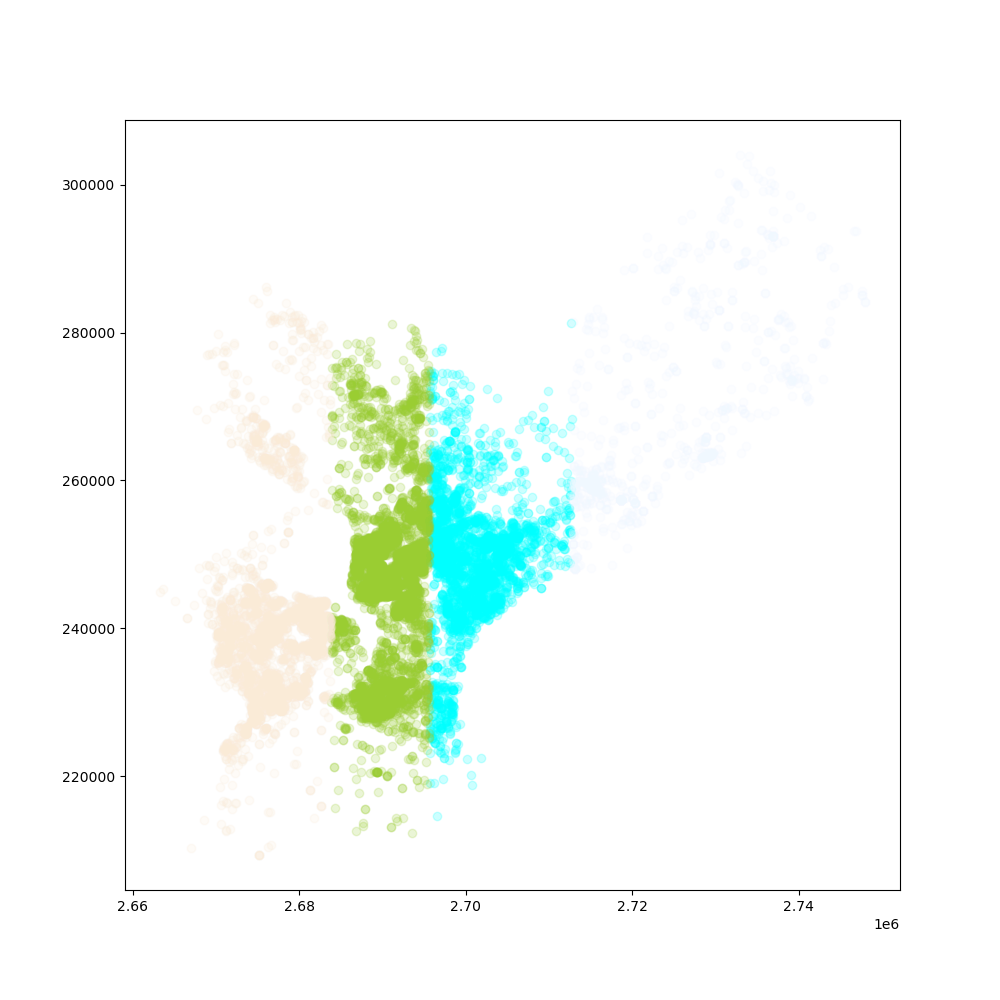

In [16]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)

colors = [item for item in mcolors.CSS4_COLORS.keys()]
def plotScatter(cluster,field):
  data_plot = data.loc[data[field] == cluster]
  plt.scatter(
        x = data_plot['geocode_x']
      , y = data_plot['geocode_y']
      , color = colors[cluster-1]
      , alpha = 0.2
  )
[plotScatter(i,'clusters_K') for i in data.clusters_K.unique()]


In [14]:
data.clusters_db.value_counts()
data.pivot_table(
      index = 'clusters_db'
    , values = 'short_zip'
    , aggfunc = pd.Series.nunique
)

,short_zip
clusters_db,
-1,2
0,47
1,2
2,1


In [15]:
[plotScatter(i,'clusters_db') for i in data.clusters_db.unique()]


[None, None, None, None]

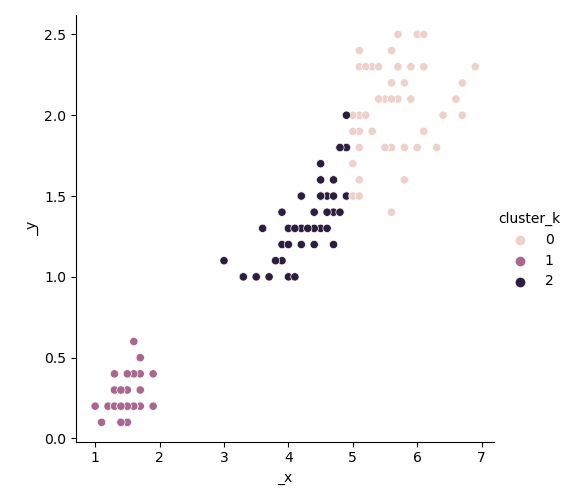

In [175]:
import sklearn.datasets
import seaborn as sns
data_sample = sklearn.datasets.load_iris()
data_sample = pd.DataFrame(
      data = data_sample['data']
    , columns = data_sample['feature_names']
)

data_sample = data_sample.assign(
    cluster_k = KMeans(n_clusters = 3).fit(
          X = StandardScaler().fit(data_sample.iloc[:,[2]]).transform(data_sample.iloc[:,[2]])
        , y = StandardScaler().fit(data_sample.iloc[:,[3]]).transform(data_sample.iloc[:,[3]])
    ).labels_
    , 
)
sns.relplot(
      data = data_sample
    , x = data_sample.iloc[:,2].values
    , y = data_sample.iloc[:,3].values
    , hue = 'cluster_k'
)

In [119]:
data_sample.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_k
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
